<a href="https://colab.research.google.com/github/pyhtonman0101/Global-Terrorism-Analysis/blob/main/Zahid_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 1/Global Terrorism Data.csv'
df = pd.read_csv(file_path, encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
#Rename and extract useful columns for better understanding before getting in dataframe.
df.rename(columns ={'iyear':'Year', 'imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_name','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace = True)

In [7]:
gt_df = df[['Year','Month','Day','Country','Region','city', 'latitude', 'longitude','Attack Type','Target','Killed','Wounded','Summary','Group_name','Target_type','Weapon_type','Motive']]

In [8]:
gt_df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,Attack Type,Target,Killed,Wounded,Summary,Group_name,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   Attack Type  181691 non-null  object 
 9   Target       181055 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Summary      115562 non-null  object 
 13  Group_name   181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


Check is there any null or Nan values in the column of "Year".

In [10]:
gt_df['Year'].isnull().unique()

array([False])

So There is no null values so no need to clean Year Column.

In [11]:
number_of_attack_each_year = gt_df.groupby(['Year'])['Year'].count()
number_of_attack_each_year

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

Text(0, 0.5, 'Number Of Attacks')

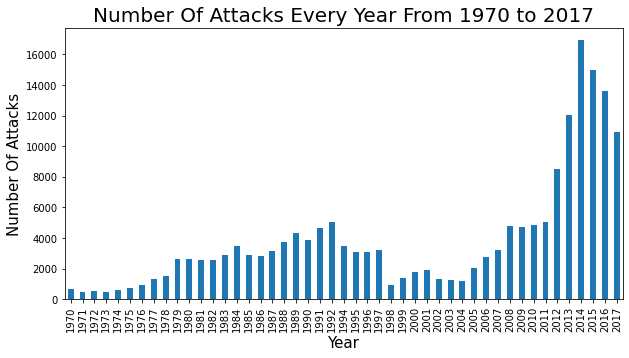

In [12]:
plt.rcParams['figure.figsize'] = (10,5)
number_of_attack_each_year.plot(kind = 'bar')
plt.title('Number Of Attacks Every Year From 1970 to 2017', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number Of Attacks', fontsize = 15)

In [13]:
attack_by_grp=gt_df['Group_name'].value_counts()
top_attack_group = attack_by_grp[1:11]
grp_name = top_attack_group.index
top_attack_grp = gt_df[gt_df['Group_name'].isin(grp_name)]

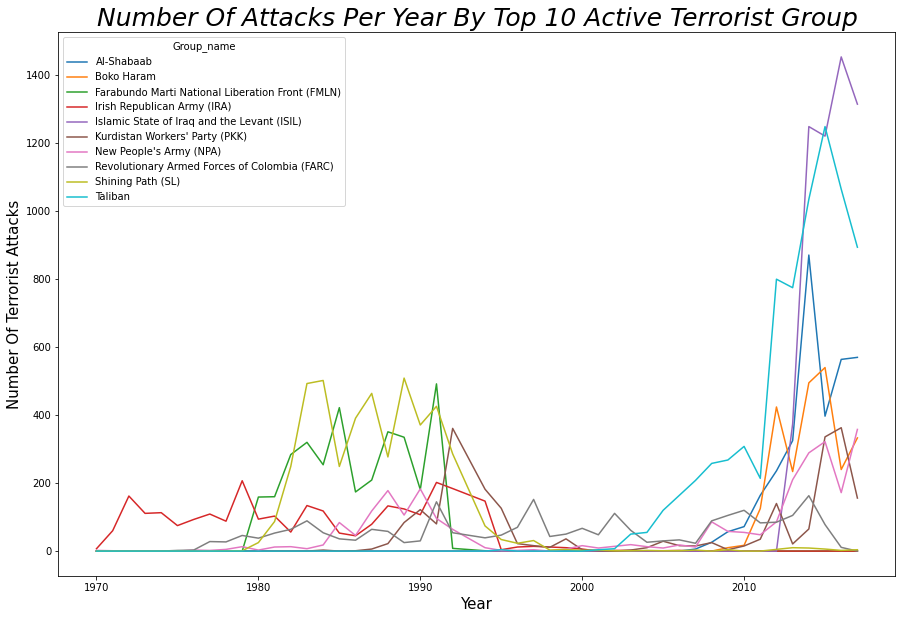

In [14]:
tag_df = top_attack_grp.groupby(['Year', 'Group_name'])['Group_name'].count().unstack()
tag_df.fillna(0, inplace = True)
plt.rcParams['figure.figsize'] = (15,10)
tag_df.plot(kind = 'line')
plt.title('Number Of Attacks Per Year By Top 10 Active Terrorist Group', fontsize=25, Style='oblique')
plt.ylabel('Number Of Terrorist Attacks',fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()

In [15]:
tag_df.head()

Group_name,Al-Shabaab,Boko Haram,Farabundo Marti National Liberation Front (FMLN),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),New People's Army (NPA),Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Taliban
Year,,,,,,,,,,
1970,0.0,0.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0
1971,0.0,0.0,0.0,60.0,0.0,0.0,1.0,0.0,0.0,0.0
1972,0.0,0.0,0.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0
1974,0.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
gt_df[(gt_df['Group_name'] == 'Taliban')]

,Year,Month,Day,Country,Region,city,latitude,longitude,Attack Type,Target,Killed,Wounded,Summary,Group_name,Target_type,Weapon_type,Motive
59040,1995,4,20,Afghanistan,South Asia,Unknown,NaN,NaN,Hostage Taking (Kidnapping),Federal Investigation Agency,0.0,0.0,NaN,Taliban,Police,Unknown,NaN
60014,1995,8,3,Afghanistan,South Asia,Kandahar,31.631083,65.742226,Hijacking,Russian Il-76 Cargo Aircraft,0.0,0.0,NaN,Taliban,Airports & Aircraft,Explosives,NaN
60462,1995,9,21,Afghanistan,South Asia,Kandahar,31.631083,65.742226,Hijacking,Boeing 727,0.0,0.0,NaN,Taliban,Airports & Aircraft,Explosives,NaN
60786,1995,10,25,Afghanistan,South Asia,Kabul,34.516895,69.147011,Bombing/Explosion,ICRC- Chartered Aircraft,0.0,0.0,NaN,Taliban,Airports & Aircraft,Explosives,NaN
71682,2001,1,7,Afghanistan,South Asia,Yakawlang,34.733333,66.966667,Armed Assault,Civilians living in the vicinity of Yakawlang,150.0,NaN,1/7/2001: Taliban militia regained control of ...,Taliban,Private Citizens & Property,Firearms,"Specific motive is unknown; however, survivors..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,2017,12,28,Afghanistan,South Asia,Ghani Khel district,34.195782,70.787483,Unknown,Fifth Brigade Officers,4.0,0.0,12/28/2017: Assailants attacked border police ...,Taliban,Police,Unknown,NaN
181619,2017,12,28,Afghanistan,South Asia,Ghazni,33.542622,68.415329,Unknown,Police Checkpoint,3.0,1.0,12/28/2017: Assailants attacked a police check...,Taliban,Police,Unknown,NaN
181651,2017,12,30,Afghanistan,South Asia,Khas Uruzgan district,32.932938,66.689238,Unknown,Checkpoints,11.0,15.0,12/30/2017: Assailants attacked security check...,Taliban,Military,Unknown,NaN
181676,2017,12,31,Afghanistan,South Asia,Mohammad Agha district,34.217806,69.109316,Bombing/Explosion,Vehicle,5.0,0.0,12/31/2017: An explosive device detonated targ...,Taliban,Police,Explosives,NaN


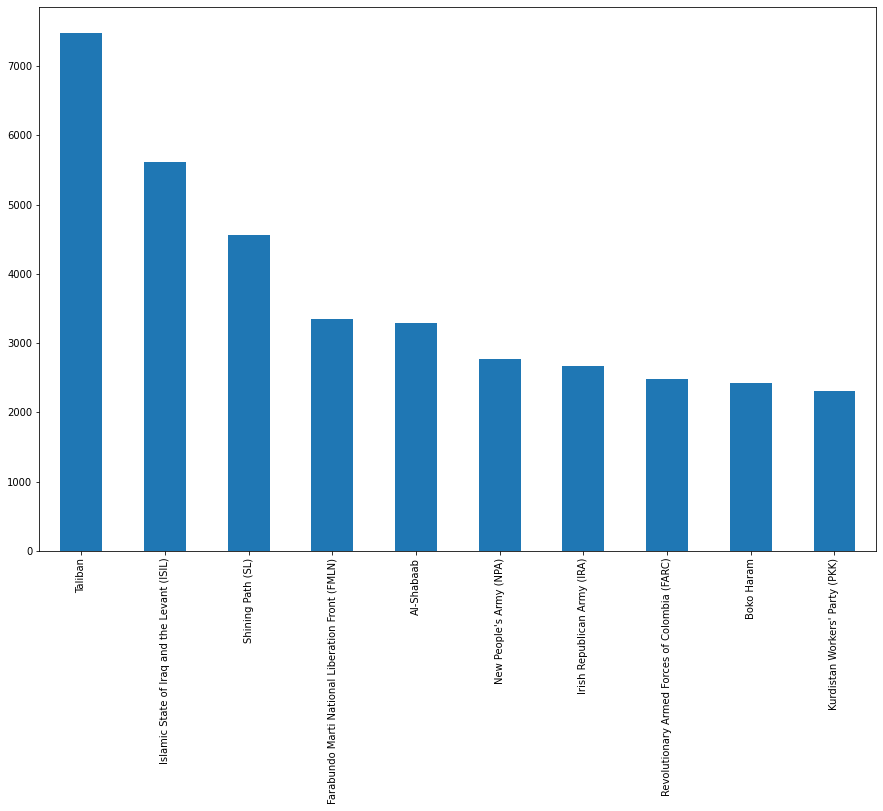

In [17]:
top_attack_group.plot(kind = 'bar')
plt.show()

# **Number Of Attacks Per Weapon**

**Check there is any null values in 'Weapon Type' column**

In [18]:
gt_df['Weapon_type'].isnull().unique()

array([False])

There is no null values. 
Now check unique values so that we can check there is any unneccery values to drop or not

In [19]:
gt_df['Weapon_type'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

We have to remove Unknown values in Weapon_type column

In [20]:
gt_df.drop(gt_df.index[gt_df['Weapon_type'] == 'Unknown'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
(gt_df['Weapon_type']=='Unknown').unique()

array([False])

In [22]:
weapon_df = gt_df.groupby(['Weapon_type'])['Weapon_type'].count()
weapon_df

Weapon_type
Biological                                                                        35
Chemical                                                                         321
Explosives                                                                     92426
Fake Weapons                                                                      33
Firearms                                                                       58524
Incendiary                                                                     11135
Melee                                                                           3655
Other                                                                            114
Radiological                                                                      14
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Name: Weapon_type, dtype: int64

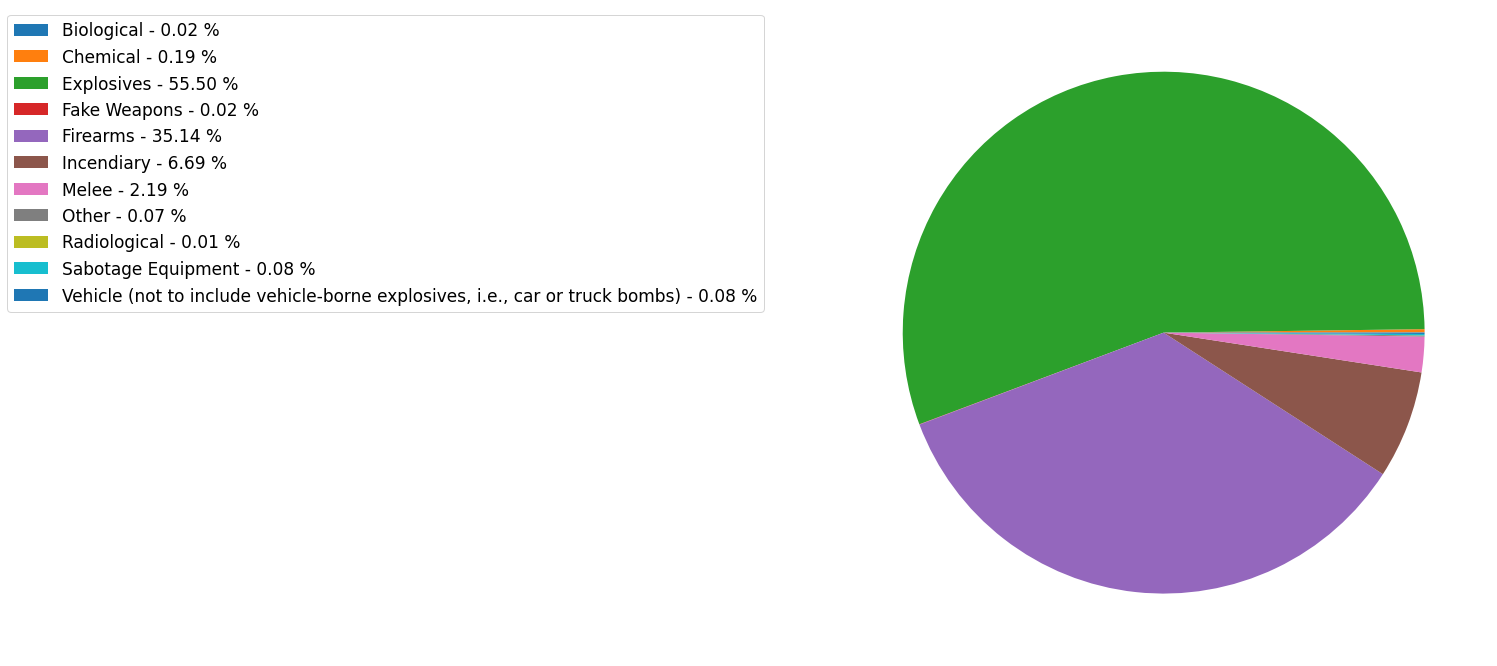

In [23]:
plt.figure(figsize=(15,12))
data = weapon_df
label = weapon_df.index
percent = 100.*data/data.sum()
plt.pie(data)

#Making customized legend by editing labels
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label, percent)]
plt.legend(labels, bbox_to_anchor=(-0.1,1), fontsize=17)
plt.show()